5장에서 합성곱 신경망(컨브넷)이 무엇인지 그리고 컴퓨터 비전 문제에 어떻게 잘 맞는지 배웠습니다. 입력의 부분 패치에서 특성을 뽑아내어 구조적인 표현을 만들고 데이터를 효율적으로 사용하는 합성곱 연산의 능력 때문입니다. 컴퓨터 비전에서 뛰어난 컨브넷의 특징이 시퀸스 처리와도 깊게 관련되어 있습니다. 시간을 2D이미지의 높이와 너비 같은 공간의 차원으로 다룰 수 있습니다.

1D컨브넷은 특정 시퀸스 처리 문제에서 RNN과 견줄 만합니다. 일반적으로 계산 비용이 훨씬 쌉니다. 1D컨브넷은 전형적으로 팽창된 커널과 함께 사용됩니다. 최근에 오디오 생성과 기계 번역 분야에서 큰 성공을 거두었습니다. 이런 특정 분야의 성공 이외에도 텍스트 분류나 시계열 예측 같은 간단한 문제에서 작은 1D 컨브넷이 RNN을 대신하여 빠르게 처리할 수 있다고 알려져 있습니다.

##시퀸스 데이터를 위한 1D합성곱 이해하기

앞서 소개한 합성곱 층은 2D합성곱입니다. 이미지 텐서에서 2D패치를 추출하고 모든 패치를 추출하고 모든 패치에 동일한 변환을 적용합니다. 같은 방식으로 시퀸스에서 1D패치를 추출하여 1D합성곱을 적용합니다.

1D 합성곱 작동 방식: 입력 시퀸스에서 시간 축으로 패치를 추출하여 출력 타임스텝을 만든다/
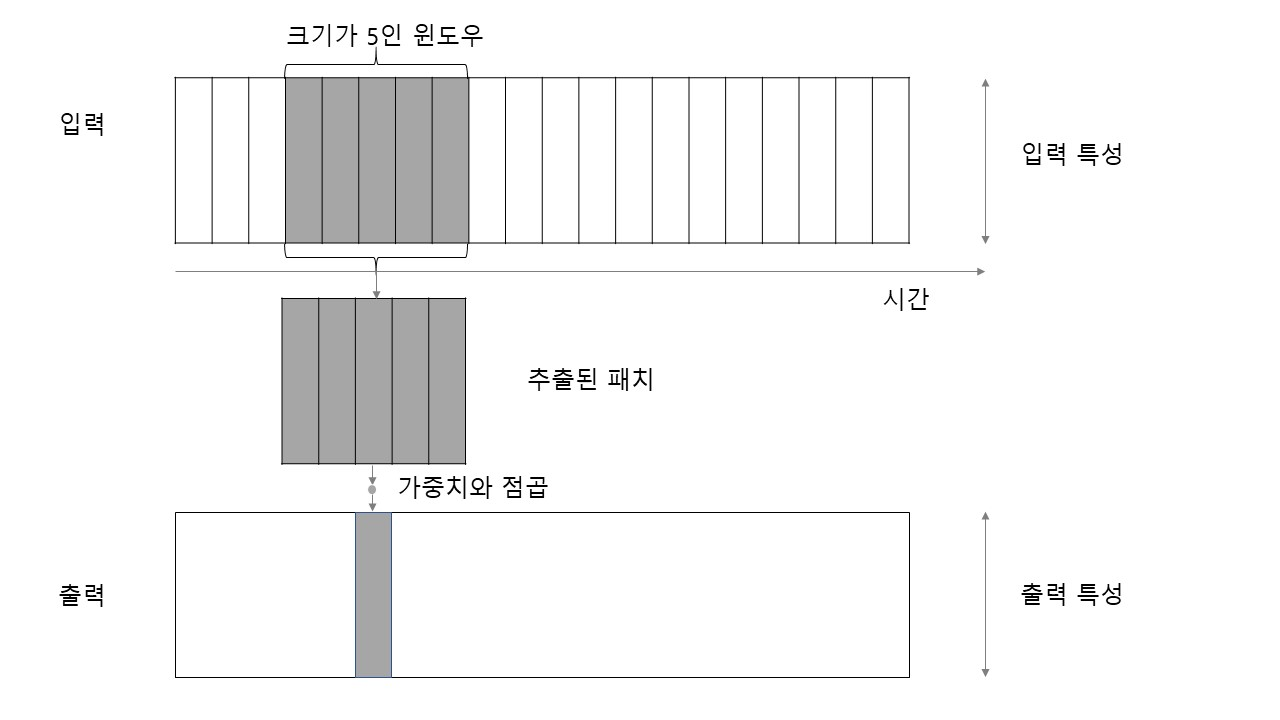

이런 1D합성곱 층은 시퀸스에 있는 지역 패턴을 인식할 수 있습니다. 동일한 변환이 시퀸스에 있는 모든 패치에 적용되기 때문에 특정 위치에서 학습한 패턴을 나중에 다른 위치에서 인식할 수 있습니다. 1D컨브넷에(시간의 이동에 대한) 이동 불변성을 제공합니다. 예를 들어 크기 5인 윈도우를 사용하여 문자 시퀸스를 처리하는 1D컨브넷은 5개 이하의 단어나 단어의 부분을 학습합니다. 이 컨브넷은 이 단어가 입력 시퀸스의 어느 문장에 있더라도 인식할 수 있습니다. 따라서 문자 수준의 1D컨브넷은 단어 형태화에 관해 학습할 수 있습니다.

## 시퀸스 데이터를 위한 1D풀링

컨브넷에서 이미지 텐서의 크기를 다운샘플링하기 위해 사용하는 평균 풀링이나 맥스 풀링같은 2D풀링 연산을 배웠습니다. 1D풀링 연산은 2D풀링 연산과 동일합니다. 입력 1D패치(부분 시퀸스)를 추출하고 최댓값(최대 풀링)을 출력하거나 평균값(평균 풀링)을 출력합니다. 2D컨브넷과 마찬가지로 1D입력의 길이를 줄이기 위해 사용합니다(서브샘플링).

##1D 컨브넷 구현

케라스에서 1D컨브넷은 Conv1D 층을 사용하여 구현합니다. Conv1D는 Conv2D와 인터페이스가 비슷합니다.(samples, time, features)크기의 3D 텐서를 입력받고 비슷한 형태의 3D 텐서를 변환합니다. 합성곱 윈도우는 시간 축의 1D윈도우 입니다. 즉 입력 텐서의 두 번째 축입니다.

간단한 2개의 층으로 된 1D컨브넷을 만들어 익숙한 IMDB감성 분류 문제에 적용해 보죠.  기억을 되살리기 위해 데이터를 로드하고 전처리하는 코드를 다시 보겠습니다.

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # 특성으로 사용할 단어의 수
max_len = 500  # 사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용합니다)

print('데이터 로드...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), '훈련 시퀀스')
print(len(x_test), '테스트 시퀀스')

print('시퀀스 패딩 (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train 크기:', x_train.shape)
print('x_test 크기:', x_test.shape)

데이터 로드...
17473536/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x time)
x_train 크기: (25000, 500)
x_test 크기: (25000, 500)


1D컨브넷은 5장에서 사용한 2D 컨브넷과 비슷한 방식으로 구성합니다. Conv1D와 MaxPooling1D층을 쌓고 전역 풀링 층이나 Flatten 층으로 마칩니다. 이 구조는 3D입력을 2D 출력으로 바꾸므로 분류나 회귀를 위해 모델에 하나 이상의 Dense 층을 추가할 수 있습니다.

한 가지 다른 점은 1D 컨브넷에 큰 합성곱 윈도우를 사용할 수 있습니다.

다음은 IMDB ㅔ이터셋을 위한 1D컨브넷의 예 입니다.

In [2]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 128)          1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 98, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
______________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
157/157 [==============================] - 88s 463ms/step - loss: 1.3994 - acc: 0.5012 - val_loss: 0.6871 - val_acc: 0.5574
Epoch 2/10
157/157 [==============================] - 72s 460ms/step - loss: 0.6746 - acc: 0.6387 - val_loss: 0.6679 - val_acc: 0.6358
Epoch 3/10
157/157 [==============================] - 72s 461ms/step - loss: 0.6371 - acc: 0.7616 - val_loss: 0.6216 - val_acc: 0.7264
Epoch 4/10
157/157 [==============================] - 72s 461ms/step - loss: 0.5689 - acc: 0.8179 - val_loss: 0.5108 - val_acc: 0.8056
Epoch 5/10
157/157 [==============================] - 72s 461ms/step - loss: 0.4392 - acc: 0.8483 - val_loss: 0.4281 - val_acc: 0.8246
Epoch 6/10
157/157 [==============================] - 72s 460ms/step - loss: 0.3410 - acc: 0.8788 - val_loss: 0.3972 - val_acc: 0.8468
Epoch 7/10
157/157 [==============================] - 73s 462ms/step - loss: 0.2957 - acc: 0.8930 - val_loss: 0.3842 - val_acc: 0.8594
Epoch 8/10
157/157 [==============================] - 7

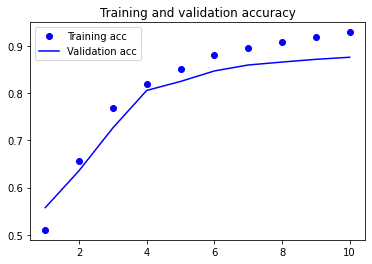

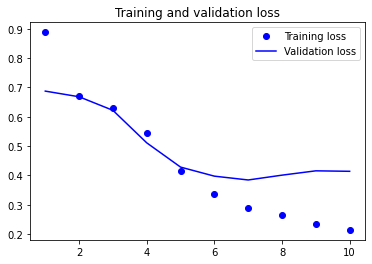

In [3]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

검증 정확도는 LSTM보다 조금 낮지만 CPU나 GPU에서 더 빠르게 실행됩니다(속도 향상은 환경에 따라 많이 다릅니다). 여기에서 적절한 에포크 수(4개)로 모델을 다시 훈련하고 테스트 세트에서 확인할 수 있습니다. 이 예는 단어 수준의 감성 분류 작업에 순환 네트워크를 대신하여 빠르고 경제적인 1D컨브넷을 사용할 수있음을 보여 줍니다.

## CNN과 RNN을 연결하여 긴 시퀸스를 처리하기
1D컨브넷이 입력 패치를 독립적으로 처리하기 때문에 RNN과 달리 (합성곱 윈도우 크기의 범위를 넘어서는) 타임스텝의 순서에 민감하지 않습니다. 물론 장기간 패턴을 인식하기 위해 많은 합성곱 층과 풀링 틍을 쌓을 수 있습니다. 상위 층은 원본 입력에서 긴 범위를 보게 될 것입니다. 이런 방법은 순서를 감지하기에 부족합니다. 온도 예측 문제에 1D컨브넷을 적용해서 이를 확인해 보겠습니다. 이 문제는 순서를 감지해야 좋은 예측을 만들어 낼 수 있습니다. 다음 예는 이전에 정의한 float_data, train_gen, val_gen, val_steps를 다시 사용합니다.

In [4]:
import os
import numpy as np

data_dir = '/content/drive/MyDrive/Classroom/케라스 창시자에게 배우는 딥러닝 연습 폴더/jena_climate'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values
    
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets
        
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step, 
                      batch_size=batch_size)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

# 전체 검증 세트를 순회하기 위해 val_gen에서 추출할 횟수
val_steps = (300000 - 200001 - lookback) // batch_size

# 전체 테스트 세트를 순회하기 위해 test_gen에서 추출할 횟수
test_steps = (len(float_data) - 300001 - lookback) // batch_size

In [5]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu',
                        input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
500/500 [==============================] - 46s 89ms/step - loss: 0.4515 - val_loss: 0.4776
Epoch 2/20
500/500 [==============================] - 44s 89ms/step - loss: 0.3602 - val_loss: 0.4569
Epoch 3/20
500/500 [==============================] - 44s 89ms/step - loss: 0.3344 - val_loss: 0.4359
Epoch 4/20
500/500 [==============================] - 44s 89ms/step - loss: 0.3197 - val_loss: 0.4494
Epoch 5/20
500/500 [==============================] - 44s 89ms/step - loss: 0.3075 - val_loss: 0.4488
Epoch 6/20
500/500 [==============================] - 44s 89ms/step - loss: 0.2998 - val_loss: 0.4484
Epoch 7/20
500/500 [==============================] - 45s 89ms/step - loss: 0.2905 - val_loss: 0.4472
Epoch 8/20
500/500 [==============================] - 45s 90ms/step - loss: 0.2851 - val_loss: 0.4564
Epoch 9/20
500/500 [==============================] - 45s 90ms/step - loss: 0.2804 - val_loss: 0.4577
Epoch 10/20
500/500 [==============================] - 45s 90ms/step - loss: 0.271

다음은 훈련 MAE와 검증 MAE를 보여 줍니다.

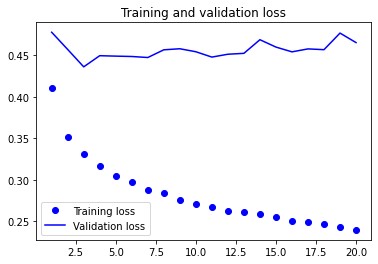

In [6]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

검증 MAE는 0.40대에 머물러 있습니다. 작은 컨브넷을 사용해서 상식 수준의 기준점을 넘지 못했습니다. 이는 컨브넷이 입력 시계열에 있는 패턴을 보고 이 패턴의 시간 축의 취치(시작인지 끝 부분인지 등)를 고려하지 않기 때문입니다. 최근 데이터 포인트일수록 오래된 데이터 포인트와는 다르게 해석해야 하기 때문에 컨브넷이 의미 있는 결과를 만들지 못합니다. 이런 컨브넷의 한계는 IMDB 데이터에서는 문제가 되지 않습니다. 긍정 또는 부정적인 감성과 연관된 키워드 패턴의 중요성은 입력 시퀸스에 나타난 위치와 무관하기 때문입니다.

컨브넷의 속도와 경량함을 RNN의 순서 감지 능력과 결합하는 한 가지 전략은 1D 컨브넷을 RNN 이전에 전처리 단계로 사용하는 것입니다. 수천 개의 스텝을 가진 시퀸스 같이 RNN으로 처리하기에는 현실적으로 너무 긴 시퀸스를 다룰 때 특별히 도움이 됩니다. 컨브넷이 긴 입력 시퀸스를 더 짧은 고수준 특성의(다운샘플된) 시퀸스로 변환합니다. 추출된 특성의 시퀸스는 RNN 파트의 입력이 됩니다.

긴 시퀸스를 처리하기 위해 1D 컨브넷과 RNN 결합하기
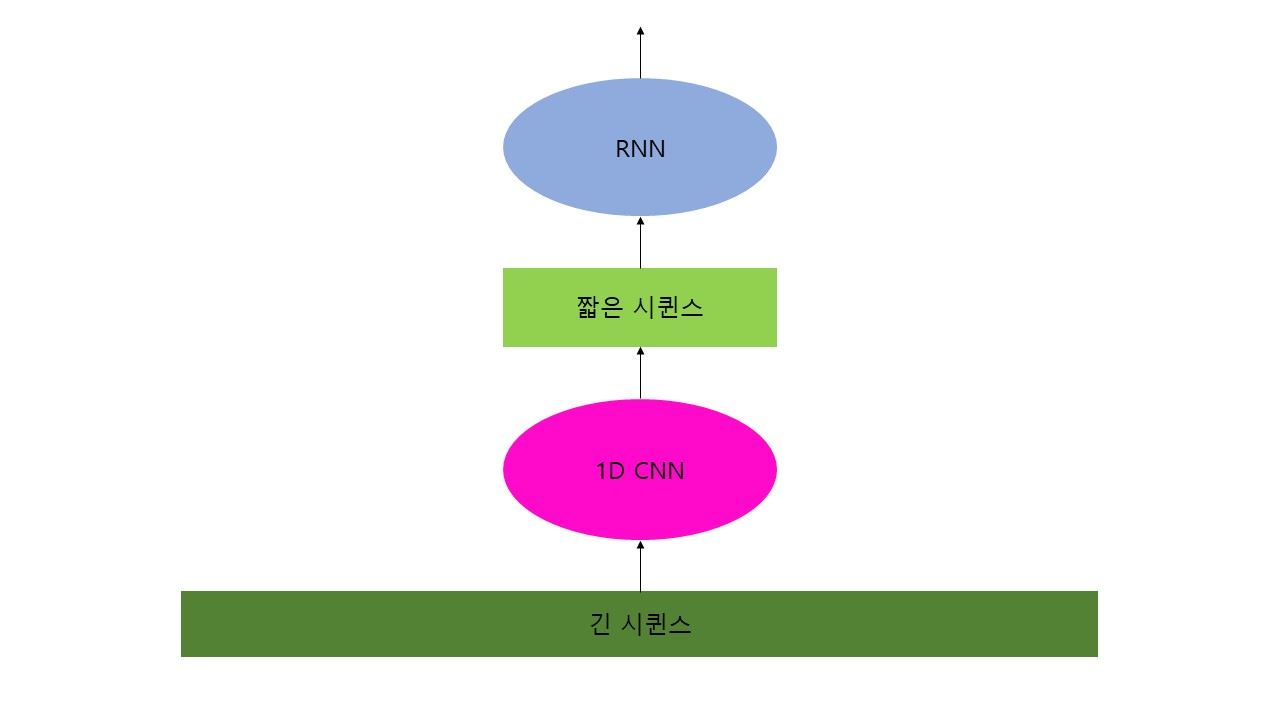

이 기법이 연구 논문이나 실전 애플리케이션에 자주 등장하지는 않습니다. 아마도 널리 알려지지 않았기 때문일 것입니다. 이 방법은 효과적이므로 많이 사용되기를 바랍니다. 온도 예측 문제에 적용해 보죠. 이 전략은 훨씬 긴 시퀀스를 다룰 수 있으므로 더 오래 전 데이터를 바라보거나(데이터 제네레이터의 lookback 매개변수를 증가시킵니다) 시계열 데이터를 더 촘촘히 바라볼 수 있습니다(제너레이터의 step 매개변수를 감소시킵니다). 여기서는 그냥 step을 절반으로 줄여서 사용하겠습니다. 온도 데이터가 30분마다 1포인트씩 샘플링 되기 떄문에 결과 시계열 데이터는 2배로 길어집니다. 앞서 정의한 제너레이터 함수를 다시 사용합니다.

In [7]:
# 이전에는 6이었습니다(시간마다 1 포인트), 이제는 3 입니다(30분마다 1 포인트)
step = 3
lookback = 1440  # 변경되지 않았습니다!
delay = 144 # 변경되지 않았습니다!

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step)
val_steps = (300000 - 200001 - lookback) // 128
test_steps = (len(float_data) - 300001 - lookback) // 128

이 모델은 두 개의 Conv1D 층 다음에 GRU 층을 놓았습니다:

In [8]:
model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu',
                        input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, None, 32)          2272      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
gru (GRU)                    (None, 32)                6336      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 13,793
Trainable params: 13,793
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


500/500 [==============================] - 191s 359ms/step - loss: 0.3621 - val_loss: 0.2791
Epoch 2/20
500/500 [==============================] - 179s 358ms/step - loss: 0.2987 - val_loss: 0.3029
Epoch 3/20
500/500 [==============================] - 179s 358ms/step - loss: 0.2873 - val_loss: 0.2785
Epoch 4/20
500/500 [==============================] - 179s 358ms/step - loss: 0.2736 - val_loss: 0.2738
Epoch 5/20
500/500 [==============================] - 179s 359ms/step - loss: 0.2668 - val_loss: 0.2807
Epoch 6/20
500/500 [==============================] - 179s 358ms/step - loss: 0.2605 - val_loss: 0.2860
Epoch 7/20
500/500 [==============================] - 180s 361ms/step - loss: 0.2543 - val_loss: 0.2807
Epoch 8/20
500/500 [==============================] - 180s 361ms/step - loss: 0.2477 - val_loss: 0.2819
Epoch 9/20
500/500 [==============================] - 180s 359ms/step - loss: 0.2393 - val_loss: 0.2875
Epoch 10/20
500/500 [==============================] - 179s 359ms/step - lo

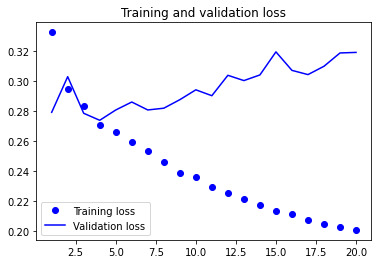

In [9]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

검증 손실로 비교해 보면 이 설정은 규제가 있는 GRU 모델만큼 좋지는 않습니다. 하지만 훨씬 빠르기 때문에 데이터를 두 배 더 많이 처리할 수 있습니다. 여기서는 큰 도움이 안 되었지만 다른 데이터셋에서는 중요할 수 있습니다

##정리
다음은 이번 절에서 배운 것들입니다.

 * 2D 컨브넷이 2D 공간의 시각적 패턴을 잘 처리하는 것과 같이 1D 컨브넷은 시간에 따른 패턴을 잘 처리합니다. 1D 컨브넷은 특정 자연어 처리 같은 일부 문제에 RNN을 대신할 수 있는 빠른 모델입니다.
 * 전형적으로 1D 컨브넷은 컴퓨터 비전 분야의 2D 컨브넷과 비슷하게 구성합니다. Conv1D 층과 Max-Pooling1D 층을 쌓고 마지막에 전역 풀링 연산이나 Flatten 층을 둡니다.
 * RNN으로 아주 긴 시퀀스를 처리하려면 계산 비용이 많이 듭니다. 1D 컨브넷은 비용이 적게 듭니다. 따라서 1D 컨브넷을 RNN 이전의 전처리 단계로 사용하는 것은 좋은 생각입니다. 시퀀스 길이를 줄이고 RNN이 처리할 유용한 표현을 추출해 줄 것입니다.

 
유용하고 중요한 개념이지만 여기서 다루지 않은 것은 팽창 커널을 사용한 1D 합성곱입니다.